# Demo notebook

Notebook description.

## Imports

In [1]:
# Assume we're running from project root
%cd .. 

/Users/cfn18/Documents/PhD-Work/Thesis-Computing/Determinisitc/l96_ebm_boundary_crisis


In [22]:
# Local imports
# from src.foo import bar

# Custom Code Imports
from l96_ebm.deterministic.utils.i_o import get_attractor
from calvin_stats.plots import init_2d_fax

# Other imports
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## Plot/Data Locations

In [7]:
plot_pd = Path('plots')
data_pd = Path('data')
config_pd = Path('cfg')

# Plotting a bifurcation diagram

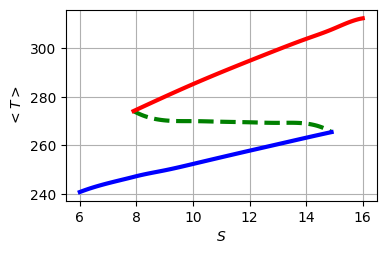

In [39]:
fig, ax = init_2d_fax()
sb_S = [*range(6, 8)] + [7.9] + [*range(8, 15)] + [14.9]
w_S  = [7.9] + [*range(8, 15)] + [14.9] + [*range(15, 17)]
m_S = [7.9] + [*range(9, 15)] + [14.9]

# Observations
sb_T_means = [get_attractor(S, 'sb').T_mean for S in sb_S]
w_T_means = [get_attractor(S, 'w').T_mean for S in w_S]
m_T_means = [get_attractor(7.9, 'w').T_mean] + [get_attractor(S, 'm').T_mean for S in [*range(9, 15)]] + [get_attractor(14.9, 'sb').T_mean] 

# Interpolate on to grid
w_S_values = np.linspace(min(w_S), max(w_S), 100)
sb_S_values = np.linspace(min(sb_S), max(sb_S), 100)
m_S_values = np.linspace(min(m_S), max(m_S), 100)
w_function = interp1d(w_S, w_T_means, kind="cubic")
sb_function = interp1d(sb_S, sb_T_means, kind="cubic")
m_function = interp1d(m_S, m_T_means, kind="cubic")

ax.plot(m_S_values, m_function(m_S_values), c="g", ls='--', lw=3)
ax.plot(w_S_values, w_function(w_S_values), c="r", lw=3)
ax.plot(sb_S_values, sb_function(sb_S_values), c="b", lw=3)

ax.set_xlabel('$S$')
ax.set_ylabel('$<T>$')
# fig.savefig(plot_pd/'T_Bifurcation_diagrma.pdf')

## Boundary Crisis Plots

Plots of the attractors moving towards the M-States

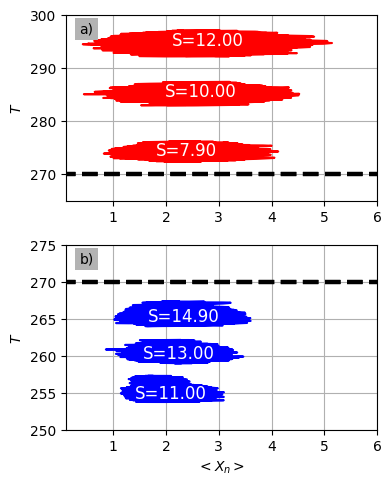

In [38]:
# W Boundary
fig, axes = init_2d_fax(nrows=2)

w_attractors = [get_attractor(S, 'w') for S in [7.9, 10, 12]]
for attractor in w_attractors:
    ax = axes[0]
    fax = [fig, ax]
    attractor.MT_plot(fax=fax)

    # Add Textboc
    props = dict(boxstyle='round', facecolor='wheat')
    ax.text(attractor.M_mean-0.6, attractor.T_mean+2, f'S={attractor.S:.2f}', fontsize=12,
        verticalalignment='top',c='w')
    ax.set_ylim(265, 300)
    ax.plot(np.linspace(0, 6), np.full_like(np.linspace(0, 6), 270), ls='--', lw=3, c='k')
    ax.set_xlim(0.1, 6)
    ax.set_xlabel('')

# SB boundary
sb_attractors = [get_attractor(S, 'sb') for S in [11, 13, 14.9]]
for attractor in sb_attractors:
    ax = axes[1]
    fax = [fig, ax]
    attractor.MT_plot(fax=fax)
    ax.text(attractor.M_mean-0.6, attractor.T_mean + 1, f'S={attractor.S:.2f}', fontsize=12,
        verticalalignment='top',c='w')
    ax.set_ylim(250, 275)
    ax.plot(np.linspace(0, 6), np.full_like(np.linspace(0, 6), 270), ls='--', lw=3, c='k')
    ax.set_xlim(0.1, 6)

fig.tight_layout()
# fig.savefig(plot_pd/'Approach_to_Boundary.pdf')